In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

#Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale= 1./255,horizontal_flip =True,vertical_flip = True,zoom_range = 0.2)

test_data = ImageDataGenerator(rescale= 1./255)

In [7]:
Flower_train = train_data.flow_from_directory('/content/flowers',
                                            target_size = (64,64),
                                            class_mode ="categorical",
                                            batch_size = 28)

Found 4317 images belonging to 5 classes.


In [9]:
Flower_test = test_data.flow_from_directory('/content/flowers',
                                          target_size = (64,64),
                                          class_mode = "categorical",
                                          batch_size = 28)

Found 4317 images belonging to 5 classes.


# Create Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [12]:
model=Sequential()

# * Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)
# * Compile The Model
# * Fit The Model

In [22]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#fully connected layer
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
# output layer
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics
=['accuracy'])
model.fit(Flower_train,steps_per_epoch=len(Flower_train),validation_data=Flower_test,
validation_steps=len(Flower_test),epochs=10)


Epoch 1/10
155/155 [==============================] - 56s 359ms/step - loss: 1.3199 - accuracy: 0.4790 - val_loss: 1.0806 - val_accuracy: 0.5729
Epoch 2/10
155/155 [==============================] - 56s 364ms/step - loss: 1.0543 - accuracy: 0.5821 - val_loss: 1.0078 - val_accuracy: 0.6143
Epoch 3/10
155/155 [==============================] - 56s 358ms/step - loss: 0.9571 - accuracy: 0.6312 - val_loss: 0.8995 - val_accuracy: 0.6581
Epoch 4/10
155/155 [==============================] - 57s 368ms/step - loss: 0.9218 - accuracy: 0.6349 - val_loss: 0.9846 - val_accuracy: 0.6099
Epoch 5/10
155/155 [==============================] - 55s 357ms/step - loss: 0.8813 - accuracy: 0.6616 - val_loss: 0.8787 - val_accuracy: 0.6491
Epoch 6/10
155/155 [==============================] - 55s 354ms/step - loss: 0.8510 - accuracy: 0.6718 - val_loss: 0.8958 - val_accuracy: 0.6569
Epoch 7/10
155/155 [==============================] - 58s 372ms/step - loss: 0.8194 - accuracy: 0.6801 - val_loss: 0.8786 - val_ac

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               9225900   
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 5)                 755       
                                                      

# Save The Model

In [24]:
model.save('Flower.h5')

# Test The Model

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [30]:
Rose = image.load_img('/content/flowers/rose/1562198683_8cd8cb5876_n.jpg',target_size=(200,210))

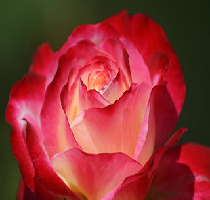

In [33]:
Rose

In [34]:
array = image.img_to_array(Rose)
array

array([[[ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        ...,
        [ 19.,  34.,  15.],
        [ 20.,  35.,  16.],
        [ 21.,  36.,  17.]],

       [[ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        ...,
        [ 21.,  34.,  16.],
        [ 21.,  34.,  16.],
        [ 21.,  34.,  16.]],

       [[ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        [ 48.,  68.,  31.],
        ...,
        [ 21.,  34.,  16.],
        [ 21.,  34.,  16.],
        [ 21.,  34.,  16.]],

       ...,

       [[ 42.,  51.,  22.],
        [ 43.,  52.,  23.],
        [ 43.,  52.,  23.],
        ...,
        [191.,  27.,  62.],
        [188.,  24.,  59.],
        [183.,  19.,  46.]],

       [[ 42.,  51.,  22.],
        [ 43.,  52.,  23.],
        [ 43.,  52.,  23.],
        ...,
        [187.,  27.,  61.],
        [187.,  26.,  60.],
        [185.,  22.,  49.]],

       [[ 42.,  51.,  22.],
        [ 43.,  52.,  23.],
        [ 43.,  

In [48]:
array = np.expand_dims(array,axis=0)
array

array([[[[ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         ...,
         [ 19.,  34.,  15.],
         [ 20.,  35.,  16.],
         [ 21.,  36.,  17.]],

        [[ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         ...,
         [ 21.,  34.,  16.],
         [ 21.,  34.,  16.],
         [ 21.,  34.,  16.]],

        [[ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         [ 48.,  68.,  31.],
         ...,
         [ 21.,  34.,  16.],
         [ 21.,  34.,  16.],
         [ 21.,  34.,  16.]],

        ...,

        [[ 42.,  51.,  22.],
         [ 43.,  52.,  23.],
         [ 43.,  52.,  23.],
         ...,
         [191.,  27.,  62.],
         [188.,  24.,  59.],
         [183.,  19.,  46.]],

        [[ 42.,  51.,  22.],
         [ 43.,  52.,  23.],
         [ 43.,  52.,  23.],
         ...,
         [187.,  27.,  61.],
         [187.,  26.,  60.],
         [185.,  22.,  49.]],

        [[ 42.,  51.,  22.],
       

In [49]:
Flower_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [56]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

In [57]:
dandelion = image.load_img('/content/flowers/dandelion/10043234166_e6dd915111_n.jpg',target_size=(64,64))
x = image.img_to_array(dandelion)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'